In [1]:
from typing import Tuple

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    f1_score, 
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('../../dataset/classification/train.csv')
test_data = pd.read_csv('../../dataset/classification/test.csv')

In [3]:
X_train = train_data.iloc[:, :-1]
Y_train = train_data.iloc[:, -1:]

X_test = test_data.iloc[:, :-1]
Y_test = test_data.iloc[:, -1:]

We divide X_train data into model training data and model validation data. We use data for model validation so as not to compromise the data for testing when determining the parameters of various models

In [4]:
(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size=0.20, random_state=42, stratify=Y_train)

We fit the model based on the alpha parameter. We are looking for the best $\alpha\$ for our model in the range [0, 3] with a step of 0.1

In [5]:
def score_model(Y_true: pd.DataFrame, Y_pred: np.ndarray) -> Tuple[float, float, float, float]:
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    accuracy = accuracy_score(Y_true, Y_pred)
    f1 = f1_score(Y_true, Y_pred)
    
    return (precision, recall, accuracy, f1)

In [ ]:
alphas = np.arange(0, 3, 0.1)
results = {}

for alpha in alphas:
    force_alpha = True if alpha == 0 else False
    mnb = MultinomialNB(alpha=alpha, force_alpha=force_alpha)
    mnb.fit(X_train, Y_train.values.ravel())
    
    Y_pred = mnb.predict(X_val)
    
    (precision, recall, accuracy, f1) = score_model(Y_val, Y_pred)
    results[alpha] = {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'f1': f1
    }

In [7]:
precisions = [results[key]['precision'] for key in results]
recalls = [results[key]['recall'] for key in results]
accuracies = [results[key]['accuracy'] for key in results]
f1s = [results[key]['f1'] for key in results]

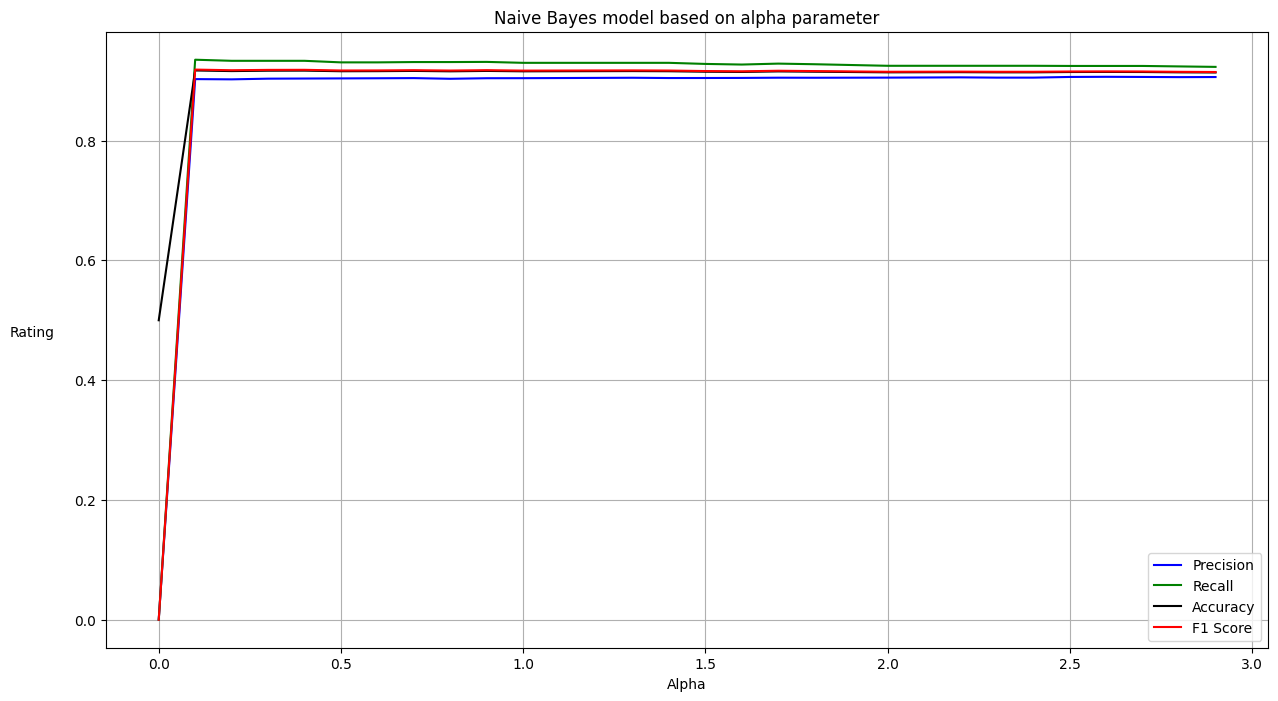

In [8]:
plt.figure(figsize=(15, 8))

plt.plot(alphas, precisions, color='blue', label='Precision')
plt.plot(alphas, recalls, color='green', label='Recall')
plt.plot(alphas, accuracies, color='black', label='Accuracy')
plt.plot(alphas, f1s, color='red', label='F1 Score')

plt.title('Naive Bayes model based on alpha parameter')
plt.xlabel('Alpha')
plt.ylabel('Rating', rotation=0, labelpad=30)
plt.grid(True)
plt.legend()

plt.show()

A slightly better view considering that the models for $\alpha$ > 0 are very similar and it is more difficult on the scale with the parameter $\alpha$ = 0 to see the differences between the models

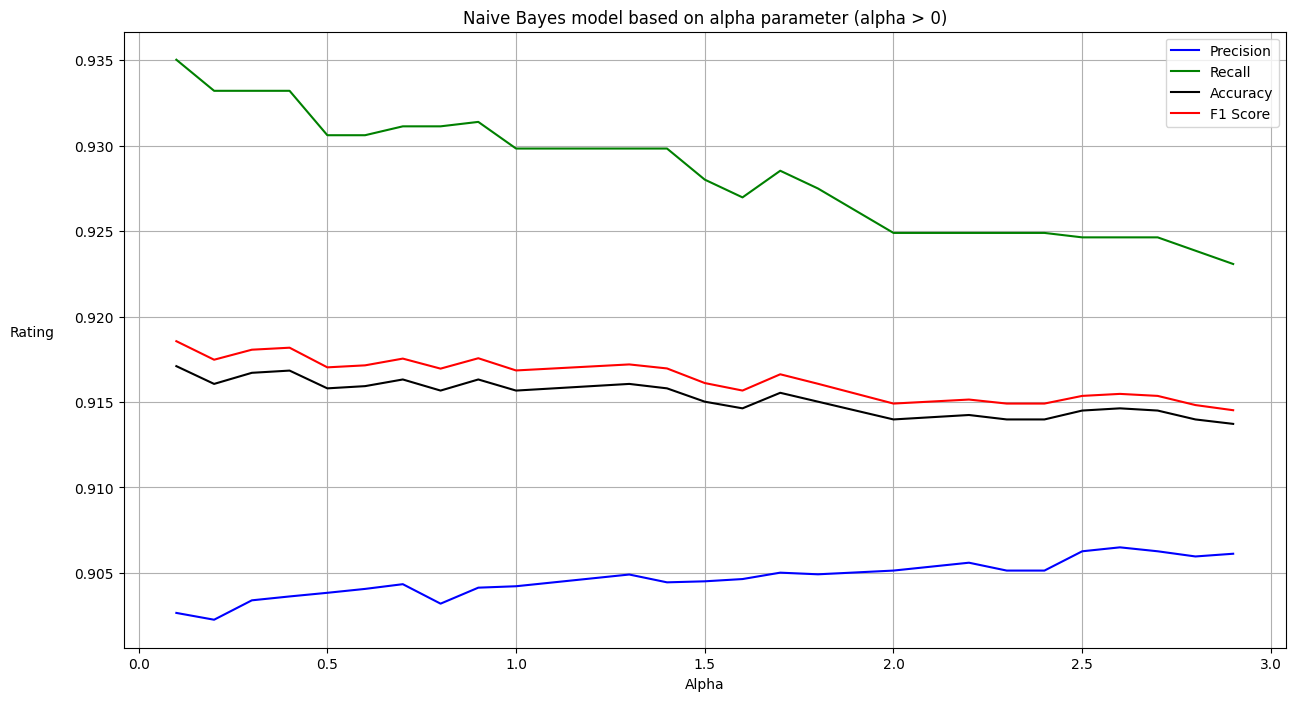

In [9]:
plt.figure(figsize=(15, 8))

plt.plot(alphas[1:], precisions[1:], color='blue', label='Precision')
plt.plot(alphas[1:], recalls[1:], color='green', label='Recall')
plt.plot(alphas[1:], accuracies[1:], color='black', label='Accuracy')
plt.plot(alphas[1:], f1s[1:], color='red', label='F1 Score')

plt.title('Naive Bayes model based on alpha parameter (alpha > 0)')
plt.xlabel('Alpha')
plt.ylabel('Rating', rotation=0, labelpad=30)
plt.grid(True)
plt.legend()

plt.show()

From the previous graph it is clear that for $\alpha$ = 0.1 the model gives the best metrics 

In [10]:
print(f'Metrics for the best model with alpha = 0.1')
print(f'Precision: {results[0.1]["precision"]}')
print(f'Recall: {results[0.1]["recall"]}')
print(f'Accuracy: {results[0.1]["accuracy"]}')
print(f'F1: {results[0.1]["f1"]}')

Metrics for the best model with alpha = 0.1
Precision: 0.9026593075765178
Recall: 0.935031185031185
Accuracy: 0.9170997920997921
F1: 0.9185601225427622


In [11]:
best_mnb = MultinomialNB(alpha=0.1, force_alpha=False)
best_mnb.fit(X_train, Y_train.values.ravel())

Y_pred = best_mnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

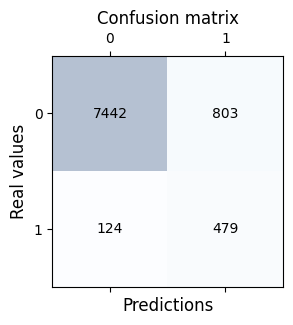

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Real values', fontsize=12)
plt.title('Confusion matrix', fontsize=12)
plt.show()

In [13]:
(precision, recall, accuracy, f1) = score_model(Y_test, Y_pred)
print(f'For alpha = 0.1 metrics on the test data:')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')

For alpha = 0.1 metrics on the test data:
Precision: 0.3736349453978159
Recall: 0.7943615257048093
Accuracy: 0.8952305605786618
F1: 0.5082228116710875


In [14]:
joblib.dump(best_mnb, 'naive_bayes.joblib')

['naive_bayes.joblib']